# 计算机图形学

本科课程 (刘晓翔授课) 以及个人的一些实验.

## 工具

首先需要定义相关工具函数 (utility) 完成光栅化等工作.

### 画点

`namedtuple` 类 `Point` 用于表示一个点与其坐标参数.

函数 `draw` 用于上下文管理.  函数 `dot` 即在笛卡尔坐标系的二维坐标中画点, 颜色默认黑色.

In [1]:
%matplotlib notebook

from collections import namedtuple
from contextlib import contextmanager
import matplotlib.pyplot as plt


Point = namedtuple('Point', ['x', 'y'])


@contextmanager
def draw():
    plt.figure()
    yield
    plt.show()


def dot(p):
    plt.scatter(*p)

例如, 画点 $P_0(4, 2)$ 与点 $P_1(2, 4)$

<IPython.core.display.Javascript object>


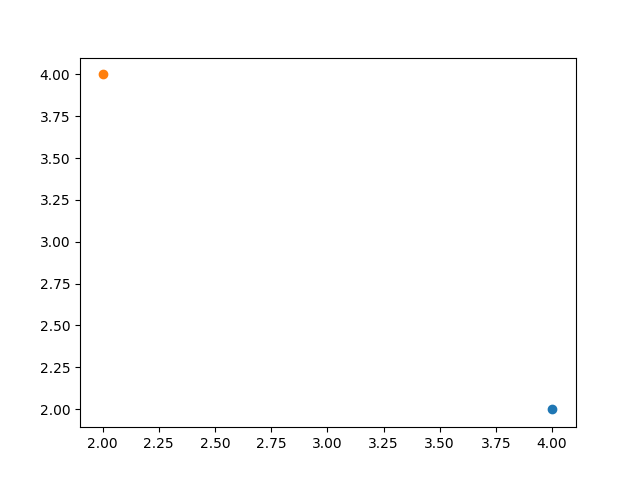

In [2]:
with draw():
    dot(Point(4, 2))
    dot(Point(2, 4))

## 基本图形的扫描转换算法

基本图形囊括

* 直线
* 圆
* 椭圆
    
### 直线

#### 基本思想

已知过端点 $P_0(x_0, y_0)$, $P_1(x_1, y_1)$ 的直线段 $L$
$$y = kx + b$$
直线斜率为 $$k = \frac{y_1 - y_0}{x_1 - x_0}$$
令 $x = x_0 \rightarrow x_1$, $x = x + \Delta x$, $y = kx + b$
$$\therefore (x, round(y))$$
其中 $round$ 指 *round half up*, 即 *四舍五入*.
这种算法效率低, 因为每一步需要一次浮点乘法和一次舍入运算.

#### 画直线的三种算法

* DDA 数值微分法 (digital differential analyzer)
* 中点画线算法 (midpoint line algorithm)
* Bresenham 画线算法 (Bresenham's line algorithm)

#### DDA 数值微分法

将 $x_{i+1} = x_i + \Delta x$ 带入 $y_{i+1}= kx_{i+1} + b$ 中有

\begin{align*}
y_{i+1} &= kx_{i+1} + b \\
        &= kx_i + b + k \Delta x \\
        &= y_i + k \Delta x
\end{align*}

当 $\Delta x =1$ 时 $y_{i+1} = y_i + k$.

即当 $x$ 每递增 1, $y$ 递增直线斜率 $k$.
算法仅适用于 $|k| \le 1$ 的情形.  在这种情况下，$x$ 每增加 1,
$y$ 最多增加 1.  当 $|k| \gt 1$ 时, 须把 $x$, $y$ 地位互换.

<IPython.core.display.Javascript object>


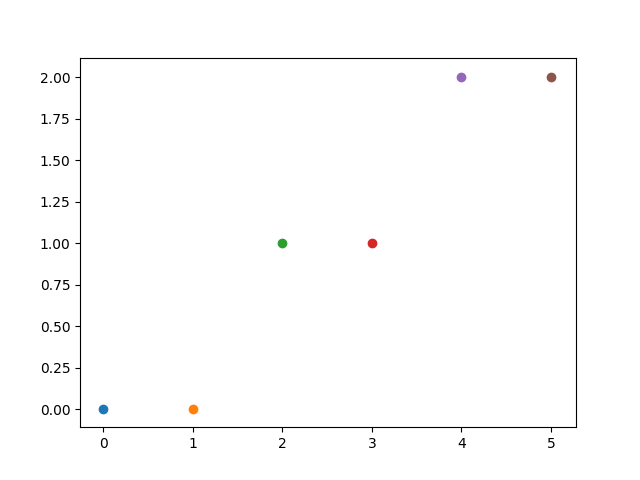

In [3]:
def line_dda(p0, p1):
    k = (p1.y - p0.y) / (p1.x - p0.x)
    assert abs(k) <= 1

    with draw():
        y = p0.y
        for x in range(p0.x, p1.x + 1):
            dot(Point(x, int(y + .5)))
            y += k


line_dda(Point(0, 0), Point(5, 2))

在此算法中 $x$, $y$, $k$ 必须支持浮点计算, 且每一步都必须对 $y$ 进行舍入取整, 不利于硬件实现.

#### 中点画线法

假设 $|k| \le 1$.

<IPython.core.display.Javascript object>


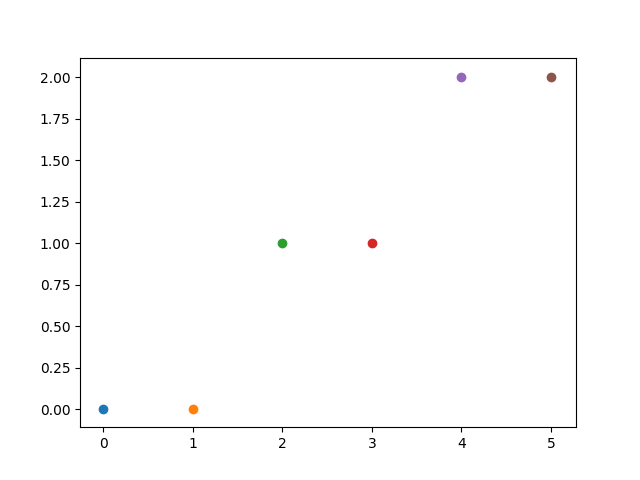

In [4]:
def line_midpoint(p0, p1):
    a = p0.y - p1.y
    b = p1.x - p0.x
    d0 = 2 * a + b
    d1 = 2 * a
    d2 = 2 * (a + b)
    assert abs(- a / b) <= 1

    with draw():
        x, y = p0.x, p0.y
        dot(Point(x, y))
        while x < p1.x:
            if d0 >= 0:
                x += 1
                d0 += d1
            else:
                x += 1
                y += 1
                d0 += d2
            dot(Point(x, y))


line_midpoint(Point(0, 0), Point(5, 2))

#### Bresenham 画线算法

假设 $|k| \le 1$.

<IPython.core.display.Javascript object>


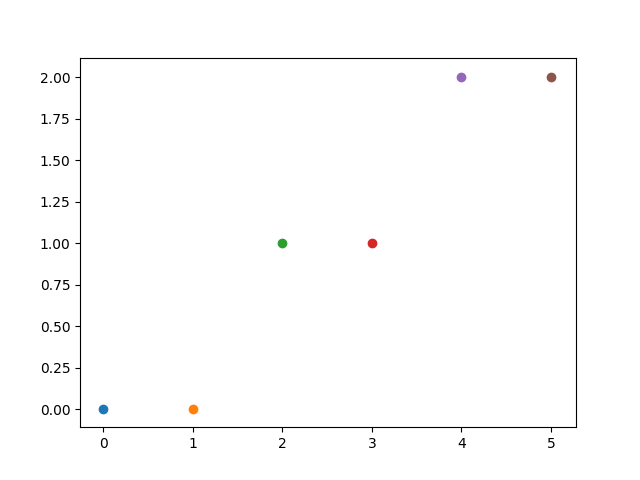

In [5]:
def line_bresenham(p0, p1):
    dx = p1.x - p0.x
    dy = p1.y - p0.y
    e = 2 * dy - dx
    assert abs(dy / dx) <= 1

    with draw():
        y = p0.y
        for x in range(p0.x, p1.x + 1):
            dot(Point(x, y))
            if e >= 0:
                y += 1
                e += 2 * (dy - dx)
            else:
                e += 2 * dy


line_bresenham(Point(0, 0), Point(5, 2))

### 圆

画圆的三种算法

* 角度 DDA 算法
* 中点画圆算法
* Bresenham 画圆算法